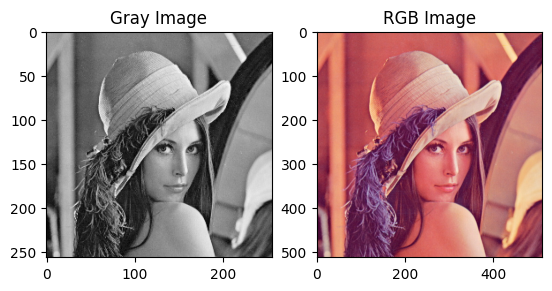

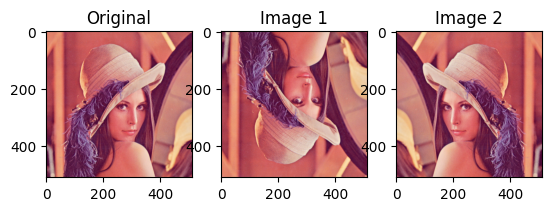

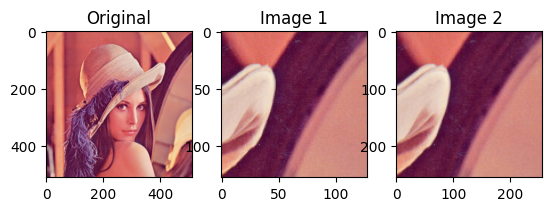

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def resize_image(image, new_row, new_col):
    org_row, org_col = image.shape[:2]
    resized_image = np.zeros((new_row, new_col, 3), dtype=np.uint8)
    scaled_row = org_row / new_row
    scaled_col = org_col / new_col
    for row in range(new_row):
        for col in range(new_col):
            resized_image[row, col] = image[
                int(scaled_row * row), int(scaled_col * col)
            ].astype(np.uint8)
    return resized_image


def convert_to_grayscale(image):
    org_row, org_col = image.shape[:2]
    grayscale_image = np.zeros((org_row, org_col), dtype=np.uint8)
    for row in range(org_row):
        for col in range(org_col):
            grayscale_value = (
                0.2989 * image[row, col, 0]
                + 0.5870 * image[row, col, 1]
                + 0.1140 * image[row, col, 2]
            )
            grayscale_image[row, col] = grayscale_value
    return grayscale_image


def display_two_images(image1, image2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image1, cmap="gray")
    ax1.set_title("Gray Image")
    ax2.imshow(image2)
    ax2.set_title("RGB Image")
    plt.show()


def flip_image_horizontally(image):
    org_row, org_col = image.shape[:2]
    flipped_image = np.zeros((org_col, org_row, 3))
    for row in range(org_row):
        for col in range(org_col):
            flipped_image[row][org_col - col - 1] = image[row][col]
    return flipped_image


def flip_image_vertically(image_array):
    org_row, org_col = image_array.shape[:2]
    flipped_image = np.zeros((org_col, org_row, 3))
    for row in range(org_row):
        for col in range(org_col):
            flipped_image[org_row - row - 1][col] = image_array[row][col]
    return flipped_image


def display_three_images(image1, image2, image3):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(image1)
    ax1.set_title("Original")
    ax2.imshow(image2)
    ax2.set_title("Image 1")
    ax3.imshow(image3)
    ax3.set_title("Image 2")
    plt.show()


topp = 0
leftt = 0


def random_crop_numpy(img, output_size=(128, 128)):
    assert len(output_size) == 2
    height, width = img.shape[:2]
    crop_height, crop_width = output_size
    top = np.random.randint(0, height - crop_height)
    left = np.random.randint(0, width - crop_width)
    cropped_img = img[top : top + crop_height, left : left + crop_width]
    globals()["topp"] = top
    globals()["leftt"] = left
    return cropped_img


def rescale_image(image):
    req_row, req_col = 256, 256
    org_row, org_col, dim = image.shape
    scale_row = req_row / org_row
    scale_col = req_col / org_col
    scaled_image = np.zeros((req_row, req_col, dim), dtype=np.uint8)
    for row in range(req_row):
        for col in range(req_col):
            x = int(row / scale_row)
            y = int(col / scale_col)
            scaled_image[row, col] = image[x, y]
    return scaled_image


image = np.array(Image.open("lena.jpg"))
resized_image = resize_image(image, 256, 256)
Image.fromarray(resized_image).save("resized_image.jpg")
grayscale_image = convert_to_grayscale(resized_image)
Image.fromarray(grayscale_image).save("grayscale_image.jpg")
display_two_images(grayscale_image, image)
flipped_horizontally = flip_image_vertically(image).astype("float") / 255.0
flipped_vertically = flip_image_horizontally(image).astype("float") / 255.0
display_three_images(image, flipped_horizontally, flipped_vertically)
cropped_image = random_crop_numpy(image)
display_three_images(image, cropped_image, rescale_image(cropped_image))
